**Our objective is to identify different customer segments based on several wine features available. So, the shop owner of Wine shop can recommend wine according to the customer segment.**

Step 1 : Importing necessary libraries.

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Step 2 : Importing dataset and retrieving necessary cells.

In [ ]:
#Load the Dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

Step 3 : Here, we are dividing the dataset into Training set and Test set. That means, we use maximum data to train the model, and separate some data for testing.

In [ ]:
#Split the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# print(X)
# print(y)

* Here X is independent variables and Y is dependent variable. Y is dependent because the prediction of y depends upon X values.

Step 4 : Feature scaling is an important step to perform.It is a step of Data Pre Processing that is applied to independent variables or features of data. It basically helps to normalize the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.

In [ ]:
#Apply Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Step 5 : Linear Discriminant Analysis
* Here, n_components = 2 represents the number of extracted features. That means we are using only 2 features from all the features. And these two features will give best result.

In [ ]:
#Apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
# print(X_train)
# print(X_test)

Step 6 : Logistic Regression
* Logistic regression is a simple and more efficient method for binary and linear classification problems. It is a classification model, which is very easy to realize and achieves very good performance with linearly separable classes. It is an extensively employed algorithm for classification in industry.
* Scikit-learn has a highly optimized version of logistic regression implementation, which supports multiclass classification task 

In [ ]:
#Fit Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Note : Always apply LDA first before applying classification algorithm.**

STep 7 : To predict the test set results.

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)

[1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1]


Step 8 : Since we trained and tested the data. We need to know the accuracy level so that we can measure how optimum our model is.

In [ ]:
#Check the accuracy by Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

We got 100% accuracy. That`s fantastic!!

Step 9 : Now, Its time to visualize graphically how did LDA played the role. So using ListedColormap we will plot the graph showing that all three wines of our dataset are clustered seperately.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


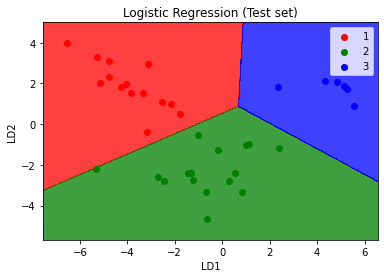

In [ ]:
#Visualize the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

**Here, all the three classes are falling into the correct region.Hence, the LDA is applied successfully.**